In [1]:
import numpy as np
import pandas as pd
from sko.ACA import ACA_TSP
from utils import parse_UK_Data, generate_coordinates, generate_routes, decode_routes, generate_distance_matrix
from scipy import spatial
import matplotlib.pyplot as plt
import time

from tqdm import tqdm
import json

# https://stackoverflow.com/questions/40536560/ipython-and-jupyter-autocomplete-not-working#40544668
%config Completer.use_jedi = False

dataset = "../datasets/UK10_1.txt"

meta_data, distance_data, station_data = parse_UK_Data(dataset)

In [3]:
meta_data

,Customer Amount,Vehicle Curb Weight(kg),Max Load(kg),Minimum Speed(km/h),Maximum Speed(km/h)
0,10,6350,3650,20,90


In [4]:
distance_data

,0,1,2,3,4,5,6,7,8,9,10
0,0,41150,25680,54200,95380,15910,88960,74120,26010,88181,66070
1,40660,0,51980,32800,99870,42210,75660,63880,24350,72070,26250
2,25010,51780,0,61520,74050,12890,69270,52590,42910,73400,76700
3,54270,32750,61560,0,77030,51930,42930,31920,49480,39500,29500
4,94930,100030,74070,76930,0,81260,55600,46100,111960,61700,106350
5,15830,42600,12880,52340,81050,0,78000,61320,33730,82130,67520
6,88751,75700,69300,43030,55210,78040,0,17200,90550,6520,68800
7,73340,63440,52480,31830,46430,61220,17130,0,75520,21260,61250
8,25990,24350,43780,49530,111730,34010,90550,75740,0,88960,48920
9,88411,71740,73420,39430,61390,82160,6550,21320,88830,0,64010


In [5]:
station_data

,City Name,Demand(kg),Ready Time(sec),Due Time(sec),Service Time(sec)
0,Kingston_upon_Hull,0,0,32400,0
1,Pocklington,721,2171,22139,1442
2,Brough,814,644,21053,1628
3,Selby,620,1049,20424,1240
4,Boughton,311,5119,24241,622
5,Barton_upon_Humber,167,2338,21697,334
6,Darfield,513,3675,24120,1026
7,Bentley,568,4401,25046,1136
8,Watton,763,3485,24335,1526
9,Cudworth,558,3740,24049,1116


In [6]:
num_points = station_data.shape[0]
distance_matrix = distance_data.to_numpy()


def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [7]:
station_coordinates = pd.read_csv('../datasets/UK10_1_coordinates.csv', encoding='utf-8')
points_coordinates = station_coordinates[["lat", "long"]].to_numpy()

In [8]:
aca = ACA_TSP(func=cal_total_distance, n_dim=11,
              size_pop=150, max_iter=100,
              distance_matrix=distance_matrix)

best_x, best_y = aca.run()


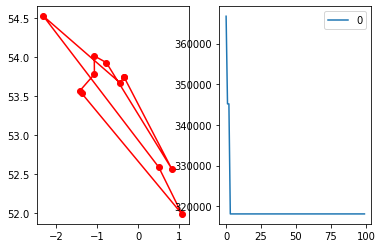

[ 0  5  2  4  7  6  9  3 10  1  8  0]


In [19]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
best_points_coordinate = points_coordinates[best_points_, :]
ax[0].plot(best_points_coordinate[:, 1], best_points_coordinate[:, 0], 'o-r')
pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
plt.show()
print(best_points_)

In [9]:
api = "Tfmt6Sxyn-nfinSHUyUo3xmVDWdtwAUyh6C8Y3HTZhU"

encoded_routes = generate_routes(best_points_coordinate, api)

100%|██████████| 11/11 [00:19<00:00,  1.80s/it]


In [10]:
distance_matrix_df, error_code_df = generate_distance_matrix(points_coordinates, api)

In [12]:
distance_matrix_df

,0,1,2,3,4,5,6,7,8,9,10
0,0,45436,207112,60243,199149,18881,97620,355274,336346,94662,70883
1,41374,0,162009,40816,330198,43528,94453,346136,327208,90520,28043
2,206972,161766,0,145180,427976,205415,170963,443914,424986,165338,124482
3,59852,39266,145518,0,312831,58295,53849,328769,309841,49916,34495
4,195907,237797,357810,220005,0,182814,226887,90070,31561,235818,255398
5,18281,44261,205937,59068,193895,0,90488,348142,228923,93487,69708
6,97304,88192,169037,54036,283088,93308,0,299026,280098,9101,81099
7,356334,347222,444568,329430,90529,354777,299620,0,84501,308551,356630
8,337503,351012,425737,307643,31638,330205,280789,83971,0,289720,337799
9,94723,90085,164810,49809,292128,93166,8859,308066,289138,0,76872


In [55]:
distance_data

,0,1,2,3,4,5,6,7,8,9,10
0,0,41150,25680,54200,95380,15910,88960,74120,26010,88181,66070
1,40660,0,51980,32800,99870,42210,75660,63880,24350,72070,26250
2,25010,51780,0,61520,74050,12890,69270,52590,42910,73400,76700
3,54270,32750,61560,0,77030,51930,42930,31920,49480,39500,29500
4,94930,100030,74070,76930,0,81260,55600,46100,111960,61700,106350
5,15830,42600,12880,52340,81050,0,78000,61320,33730,82130,67520
6,88751,75700,69300,43030,55210,78040,0,17200,90550,6520,68800
7,73340,63440,52480,31830,46430,61220,17130,0,75520,21260,61250
8,25990,24350,43780,49530,111730,34010,90550,75740,0,88960,48920
9,88411,71740,73420,39430,61390,82160,6550,21320,88830,0,64010


In [13]:
error_code_df

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,3,0,0,0,0,0,0,0
1,0,0,0,3,0,0,0,0,0,0,0
2,0,0,0,3,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,3,0,0,0,0,0,0,0
5,0,0,0,3,0,0,0,0,0,0,0
6,0,0,0,3,0,0,0,0,0,0,0
7,0,0,0,3,0,0,0,0,0,0,0
8,0,0,0,3,0,0,0,0,0,0,0
9,0,0,0,3,0,0,0,0,0,0,0


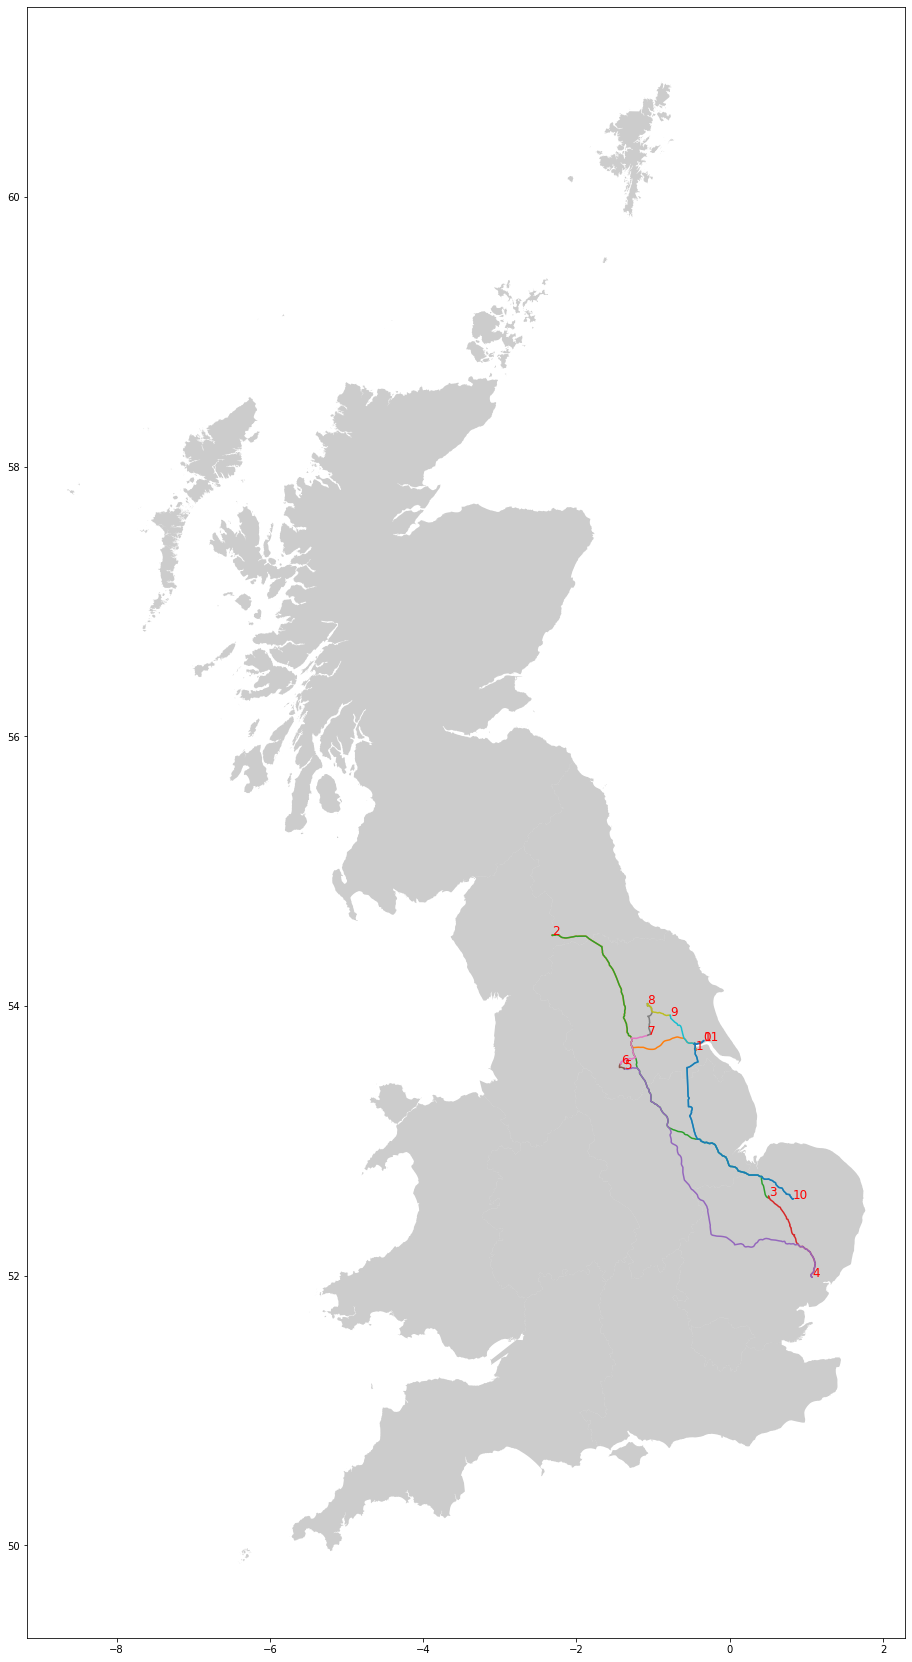

In [14]:
import geoplot as gplt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


UK = gpd.read_file("../datasets/Regions__December_2019__Boundaries_EN_BFC-shp/Regions__December_2019__Boundaries_EN_BFC.shp")
dbf = gpd.GeoDataFrame.from_file(u"../datasets/united_kingdom_european_regions/european_region_region.dbf")
dbf = dbf.to_crs("EPSG:4326")
fig, ax = plt.subplots(figsize=(30,30))# add .shp mapfile to axes
dbf.plot(ax=ax, alpha=0.4,color="grey")
#ax.plot(best_points_coordinate[:, 1], best_points_coordinate[:, 0])

decoded_routes = decode_routes(encoded_routes)
for route in decoded_routes:
    ax.plot(route[:,1], route[:,0])
    
for i, (x, y) in enumerate(zip(best_points_coordinate[:, 1], best_points_coordinate[:, 0])):
    ax.text(x, y, str(i), color="red", fontsize=12)
